# WeatherPy
----

#### Observations
1. As it was expected, we have data to prove that temperature does indeed rise as we get closer to the equator. 
2. Intrestingly, there doesn't seem to be a stron corelation between latiture and humity, cloudiness, or wind speed.
3. The weaskest correlation, almost to the point of being negligible, is the one between latitude and humidity, particularly in the southern hemisphere.

In [66]:
import gmaps
import json
import requests
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
from scipy import stats

## Generate Cities List

In [2]:
#Set ranges from which to extract random latitudes and longitudes
lat_rng = [-90, 90]
lng_rng = [-180, 180]

#Create empty list to hold cities
cities = []

#Generate random latitudes and longitudes to pull cities from
lat = np.random.uniform(-90, 90, 1500)
lng = np.random.uniform(-180, 180, 1500)
coordinates = list(zip(lat, lng))

#Loop through random coordinates to generate a list of cities
for coord in coordinates:
    (lat, lng) = coord
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

605

In [67]:
#Create a df using the previously generated list of cities
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df

,city
0,mys shmidta
1,qaanaaq
2,isla mujeres
3,barentsburg
4,puerto ayora
...,...
600,arica
601,souillac
602,katherine
603,tanggu


In [68]:
#Add columns to hold the additional data
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mys shmidta,,,,,,,,
1,qaanaaq,,,,,,,,
2,isla mujeres,,,,,,,,
3,barentsburg,,,,,,,,
4,puerto ayora,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
#Loop through cities ro retrieve data
print("Beginning Data Retrieval")
print("___________________")

url = 'http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

for index, row in cities_df.iterrows():
    city = row["city"]
    response = requests.get(query_url + city).json()
    print(f"Processing record for city number {index}: {city}")
    
    try:      
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        
        print(f"Processing Record {index} | {city}")
        
    except (KeyError, IndexError):
        print("City not found... Continue search.")

Beginning Data Retrieval
___________________
Processing record for city number 0: mys shmidta
City not found... Continue search.
Processing record for city number 1: qaanaaq
Processing Record 1 | qaanaaq
Processing record for city number 2: isla mujeres
Processing Record 2 | isla mujeres
Processing record for city number 3: barentsburg
City not found... Continue search.
Processing record for city number 4: puerto ayora
Processing Record 4 | puerto ayora
Processing record for city number 5: hasaki
Processing Record 5 | hasaki
Processing record for city number 6: provideniya
Processing Record 6 | provideniya
Processing record for city number 7: tuktoyaktuk
Processing Record 7 | tuktoyaktuk
Processing record for city number 8: ushuaia
Processing Record 8 | ushuaia
Processing record for city number 9: gambela
Processing Record 9 | gambela
Processing record for city number 10: port alfred
Processing Record 10 | port alfred
Processing record for city number 11: linxia
Processing Record 11 | 

Processing record for city number 103: snasa
Processing Record 103 | snasa
Processing record for city number 104: adrar
Processing Record 104 | adrar
Processing record for city number 105: muisne
Processing Record 105 | muisne
Processing record for city number 106: victor harbor
Processing Record 106 | victor harbor
Processing record for city number 107: santa rosa
Processing Record 107 | santa rosa
Processing record for city number 108: saint-philippe
Processing Record 108 | saint-philippe
Processing record for city number 109: tigzirt
Processing Record 109 | tigzirt
Processing record for city number 110: aquiraz
Processing Record 110 | aquiraz
Processing record for city number 111: khormuj
City not found... Continue search.
Processing record for city number 112: katsuura
Processing Record 112 | katsuura
Processing record for city number 113: chicama
Processing Record 113 | chicama
Processing record for city number 114: upernavik
Processing Record 114 | upernavik
Processing record for

Processing record for city number 203: barrow
Processing Record 203 | barrow
Processing record for city number 204: geraldton
Processing Record 204 | geraldton
Processing record for city number 205: pitimbu
Processing Record 205 | pitimbu
Processing record for city number 206: norman wells
Processing Record 206 | norman wells
Processing record for city number 207: sao joao da barra
Processing Record 207 | sao joao da barra
Processing record for city number 208: yatou
Processing Record 208 | yatou
Processing record for city number 209: kavieng
Processing Record 209 | kavieng
Processing record for city number 210: noumea
Processing Record 210 | noumea
Processing record for city number 211: samarai
Processing Record 211 | samarai
Processing record for city number 212: berlevag
Processing Record 212 | berlevag
Processing record for city number 213: hirado
Processing Record 213 | hirado
Processing record for city number 214: sunrise manor
Processing Record 214 | sunrise manor
Processing rec

Processing record for city number 303: briancon
Processing Record 303 | briancon
Processing record for city number 304: tumannyy
City not found... Continue search.
Processing record for city number 305: aksu
Processing Record 305 | aksu
Processing record for city number 306: cairns
Processing Record 306 | cairns
Processing record for city number 307: svetlogorsk
Processing Record 307 | svetlogorsk
Processing record for city number 308: longido
Processing Record 308 | longido
Processing record for city number 309: raudeberg
Processing Record 309 | raudeberg
Processing record for city number 310: lolua
City not found... Continue search.
Processing record for city number 311: kulhudhuffushi
Processing Record 311 | kulhudhuffushi
Processing record for city number 312: gazanjyk
Processing Record 312 | gazanjyk
Processing record for city number 313: mareeba
Processing Record 313 | mareeba
Processing record for city number 314: the valley
Processing Record 314 | the valley
Processing record f

Processing record for city number 404: makakilo city
Processing Record 404 | makakilo city
Processing record for city number 405: gornopravdinsk
Processing Record 405 | gornopravdinsk
Processing record for city number 406: vieste
Processing Record 406 | vieste
Processing record for city number 407: kukuna
Processing Record 407 | kukuna
Processing record for city number 408: tibati
Processing Record 408 | tibati
Processing record for city number 409: ola
Processing Record 409 | ola
Processing record for city number 410: san jose
Processing Record 410 | san jose
Processing record for city number 411: byron bay
Processing Record 411 | byron bay
Processing record for city number 412: coruripe
Processing Record 412 | coruripe
Processing record for city number 413: taonan
Processing Record 413 | taonan
Processing record for city number 414: marsh harbour
Processing Record 414 | marsh harbour
Processing record for city number 415: fort saint james
Processing Record 415 | fort saint james
Proc

Processing record for city number 505: komsomolskiy
Processing Record 505 | komsomolskiy
Processing record for city number 506: abnub
Processing Record 506 | abnub
Processing record for city number 507: carlagan
Processing Record 507 | carlagan
Processing record for city number 508: tobe
Processing Record 508 | tobe
Processing record for city number 509: feira grande
Processing Record 509 | feira grande
Processing record for city number 510: kargasok
Processing Record 510 | kargasok
Processing record for city number 511: zaoyang
Processing Record 511 | zaoyang
Processing record for city number 512: kandrian
Processing Record 512 | kandrian
Processing record for city number 513: gamba
Processing Record 513 | gamba
Processing record for city number 514: kushima
Processing Record 514 | kushima
Processing record for city number 515: bullhead city
Processing Record 515 | bullhead city
Processing record for city number 516: virginia beach
Processing Record 516 | virginia beach
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
#cities_df["Humidity"] = pd.to_numeric(cities_df['Humidity'], errors='coerce')
cities_df.dtypes

city           object
Latitude       object
Longitude      object
Max Temp       object
Humidity      float64
Cloudiness     object
Wind Speed     object
Country        object
Date           object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [82]:
over100 = cities_df[cities_df['Humidity'] > 100]
over100

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [83]:
#clean data to remove cities that have missing data & reset index
clean_cities_df = cities_df.dropna().reset_index(drop=True)
clean_cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.484,-69.3632,40.33,75.0,4,3.13,GL,1627007456
1,isla mujeres,21.2311,-86.731,84.25,85.0,0,8.39,MX,1627007456
2,puerto ayora,-0.7393,-90.3518,72.55,87.0,97,4,EC,1627007457
3,hasaki,35.7333,140.833,90.28,67.0,80,8.72,JP,1627007457
4,provideniya,64.3833,-173.3,46.51,76.0,75,11.18,RU,1627007457
...,...,...,...,...,...,...,...,...,...
548,arica,-18.475,-70.3042,59.23,82.0,90,5.75,CL,1627007607
549,souillac,-20.5167,57.5167,70.18,78.0,20,11.5,MU,1627007607
550,katherine,-14.4667,132.267,86.32,30.0,33,5.75,AU,1627007608
551,tanggu,39.0211,117.647,85.96,62.0,100,1.52,CN,1627007608


In [104]:
#Print results into a csv file and display df
cities_csv = clean_cities_df.to_csv("../Resources/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

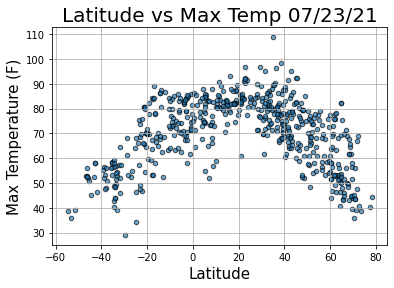

In [130]:
fig = clean_cities_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Max Temp 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.savefig('../Resources/LatvsTemp.png')
plt.show()

This code analyzes the temprature changes as we get closer/further away from the equator. 

## Latitude vs. Humidity Plot

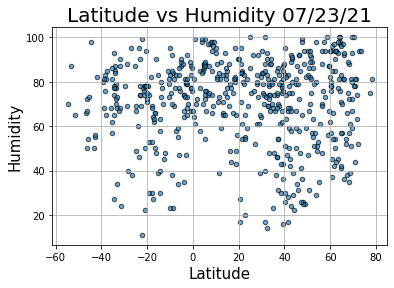

In [131]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Humidity', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Humidity 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity", size = 15)
plt.savefig('../Resources/LatvsHum.png')
plt.show()

This code analyzes the changes in humidity as we get closer/further away from the equator. 

## Latitude vs. Cloudiness Plot

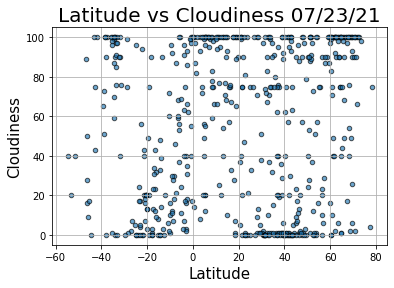

In [132]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Cloudiness', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Cloudiness 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness", size = 15)
plt.savefig('../Resources/LatvsClou.png')
plt.show()

This code analyzes the changes in cloudiness as we get closer/further away from the equator. 

## Latitude vs. Wind Speed Plot

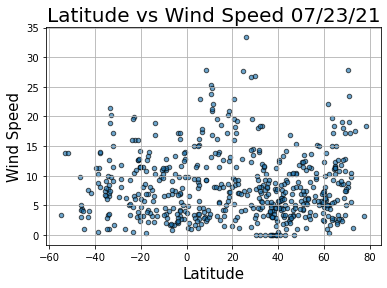

In [133]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Wind Speed', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Wind Speed 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.savefig('../Resources/LatvsWind.png')
plt.show()

This code analyzes the changes in wind speed as we get closer/further away from the equator. 

## Linear Regression

In [88]:
nor_hem_df = clean_cities_df[clean_cities_df["Latitude"] >= 0]
sou_hem_df = clean_cities_df[clean_cities_df["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [89]:
norhemlat = nor_hem_df["Latitude"].tolist()
norhemtemp = nor_hem_df["Max Temp"].tolist()

In [90]:
souhemlat = sou_hem_df["Latitude"].tolist()
souhemtemp = sou_hem_df["Max Temp"].tolist()

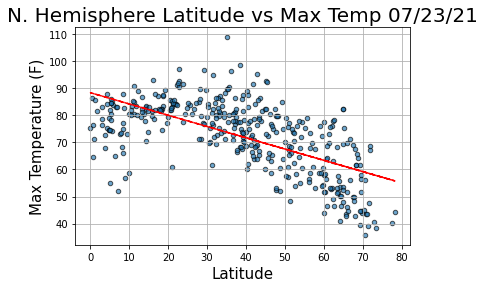

In [142]:
nor_hem_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(norhemlat, norhemtemp)
vc_fit = vc_slope * nor_hem_df["Latitude"] + vc_int
plt.plot(nor_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("N. Hemisphere Latitude vs Max Temp 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.savefig('../Resources/NorLatvsTempRegLine.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

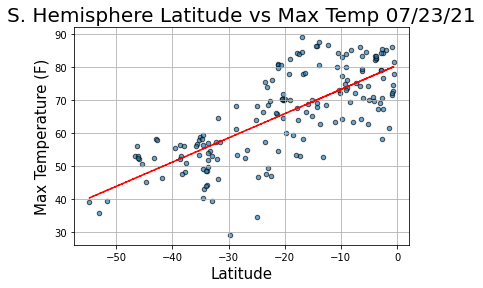

In [143]:
sou_hem_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(souhemlat, souhemtemp)
vc_fit = vc_slope * sou_hem_df["Latitude"] + vc_int
plt.plot(sou_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("S. Hemisphere Latitude vs Max Temp 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.savefig('../Resources/SouLatvsTempRegLine.png')
plt.show()

In the northern hemisphere, there is a negative correlation between maximum temperature and latitude. On the other hand, the correlation between maximum temperature and latitude in the southern hemisphere is positive. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

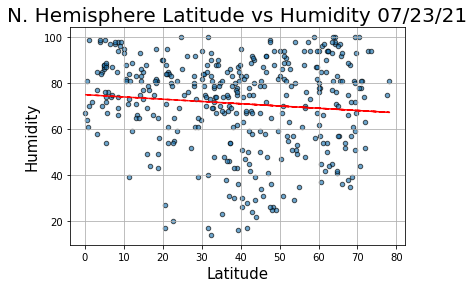

In [144]:
norhemhum = nor_hem_df["Humidity"].tolist()

nor_hem_df.plot.scatter(x ='Latitude', y ='Humidity', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(norhemlat, norhemhum)
vc_fit = vc_slope * nor_hem_df["Latitude"] + vc_int
plt.plot(nor_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("N. Hemisphere Latitude vs Humidity 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity", size = 15)
plt.savefig('../Resources/NorLatvsHumRegLine.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

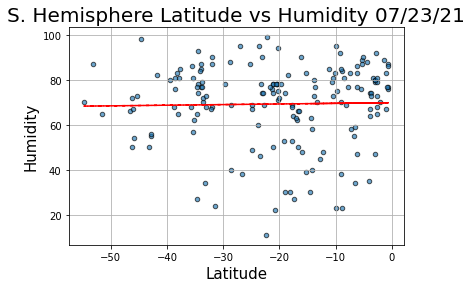

In [145]:
souhemhum = sou_hem_df['Humidity']

sou_hem_df.plot.scatter(x ='Latitude', y ='Humidity', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(souhemlat, souhemhum)
vc_fit = vc_slope * sou_hem_df["Latitude"] + vc_int
plt.plot(sou_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("S. Hemisphere Latitude vs Humidity 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity", size = 15)
plt.savefig('../Resources/SouLatvsHumRegLine.png')
plt.show()

There is a slight negatove correlation between latitude and humidity in the northern hemisphere. This same correlation in the southern hemisphere is positive by a negligible margin. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

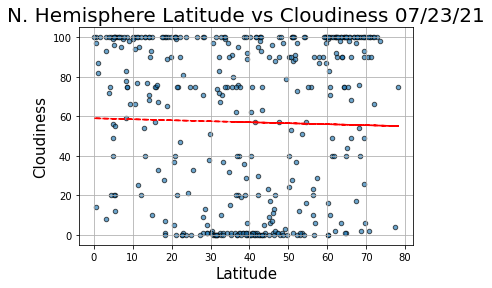

In [146]:
norhemclou = nor_hem_df['Cloudiness'].tolist()

nor_hem_df.plot.scatter(x ='Latitude', y ='Cloudiness', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(norhemlat, norhemclou)
vc_fit = vc_slope * nor_hem_df["Latitude"] + vc_int
plt.plot(nor_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("N. Hemisphere Latitude vs Cloudiness 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness", size = 15)
plt.savefig('../Resources/NorLatvsClouRegLine.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

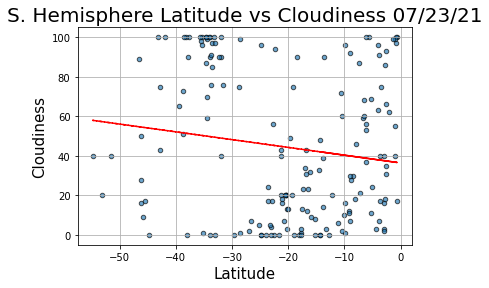

In [147]:
souhemclou = sou_hem_df['Cloudiness'].tolist()

sou_hem_df.plot.scatter(x ='Latitude', y ='Cloudiness', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(souhemlat, souhemclou)
vc_fit = vc_slope * sou_hem_df["Latitude"] + vc_int
plt.plot(sou_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("S. Hemisphere Latitude vs Cloudiness 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness", size = 15)
plt.savefig('../Resources/SouLatvsClouRegLine.png')
plt.show()

The correlation between latitude and cloudiness in both the northern and southern hemisphere is negative. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

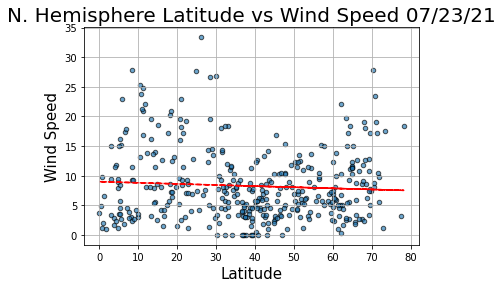

In [148]:
norhemwind = nor_hem_df['Wind Speed'].tolist()

nor_hem_df.plot.scatter(x ='Latitude', y ='Wind Speed', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(norhemlat, norhemwind)
vc_fit = vc_slope * nor_hem_df["Latitude"] + vc_int
plt.plot(nor_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("N. Hemisphere Latitude vs Wind Speed 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.savefig('../Resources/NorLatvsWindRegLine.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

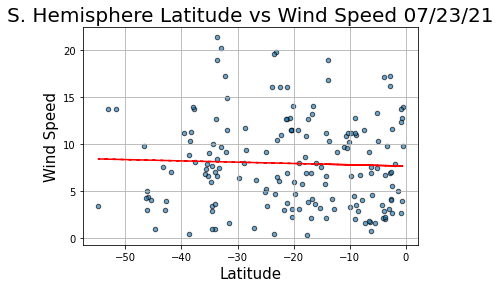

In [149]:
souhemwind = sou_hem_df['Wind Speed'].tolist()

sou_hem_df.plot.scatter(x ='Latitude', y ='Wind Speed', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(souhemlat, souhemwind)
vc_fit = vc_slope * sou_hem_df["Latitude"] + vc_int
plt.plot(sou_hem_df["Latitude"],vc_fit,"--", color='red')

plt.grid(True)
plt.title("S. Hemisphere Latitude vs Wind Speed 07/23/21", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.savefig('../Resources/SouLatvsWindRegLine.png')
plt.show()

The correlation between latitude and wind speed in both the northern and southern hemisphere is negative. 